In [1]:
import numpy as np
import matplotlib.pyplot as plt

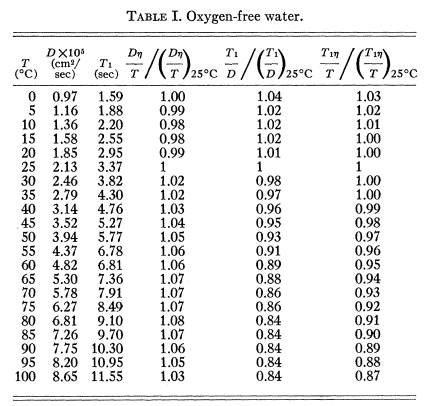

In [2]:
class self_correlation:
    def __init__(self,path='',dt=0.5,box_size=1,temperature=300,shear_viscosity=0.896):
        try:
            self.data = np.loadtxt(path)
            self.t = self.data[:,0]*dt #fs
            self.msd = self.data[:,1] #\AA
            self.calculate_coefs()
            
            self.box_size=box_size*1e-10
            self.temperature = temperature
            temperature=temperature
            self.shear_viscosity=shear_viscosity*1e-3
            
            self.correction = self.calculate_correction()
        except Exception as e:
            pass
    
        
    def get_plot(self):
        plt.figure()
        plt.plot(self.t,self.msd,lw=2.5)
        plt.plot(self.t,self.coeffs[0]*self.t+self.coeffs[1])
        plt.legend(["simulated","fit"])
        plt.show()
        
        
    def calculate_coefs(self):
        self.coeffs = np.polyfit(self.t,self.msd,deg=1)
        self.D = 1e+5*(self.coeffs[0]/6)*1e-1 #cm^2/sec
        
        
    @staticmethod  
    def expected_from_experimental(temperature):
        et = np.arange(0,105,5)
        eD = np.array([0.97,1.16,1.36,1.58,1.85,2.13,2.46,2.79,3.14,3.52,3.94,4.37,4.82,5.30,5.78,6.27,6.81,7.26,7.75,8.2,8.65])

        coeffs = np.polyfit(et,eD,deg=2)

        
        d_from_fit = (temperature**2*coeffs[0]+temperature*coeffs[1]+coeffs[2])*1e-5
        
        return d_from_fit*1e+5
    
    def calculate_correction(self,box_size=46.5687103):
        eps = 2.837297
        kb = 1.38064852*1e-23
        pi = np.pi
        
        correction = eps*self.temperature*kb/(6*pi*self.shear_viscosity*self.box_size)
        
        return correction*1e+9

In [3]:
spce_D = self_correlation(path="spce/msd.dat",box_size=46.5687103,shear_viscosity=0.729)
spcfd_D = self_correlation(path="spcfd/msd.dat",box_size=46.5687103,shear_viscosity=0.729)
spcfw_D = self_correlation(path="spcfw/msd.dat",box_size=46.5687103,shear_viscosity=0.729)
tip3p_D = self_correlation(path="tip3p/msd.dat",box_size=46.5687103,shear_viscosity=0.31)
tip4p_D = self_correlation(path="tip4p/msd.dat",box_size=46.5687103,shear_viscosity=0.494)
tip4pf_D = self_correlation(path="tip4pf/msd.dat",box_size=46.5687103,shear_viscosity=0.494)
tip4p_2005_D = self_correlation(path="2005/msd.dat",box_size=46.5687103,shear_viscosity=0.855)

In [4]:
print("Experimental data at 300K : ",self_correlation().expected_from_experimental(300-273.15))

Experimental data at 300K :  2.313110553359686


In [5]:
print("spce 300K D : ",(spce_D.D+spce_D.correction))
print("spcfd 300K D : ",spcfd_D.D+spcfd_D.correction)
print("spcfw 300K D : ",spcfw_D.D+spcfw_D.correction)
print("tip3p 300K D : ",tip3p_D.D+tip3p_D.correction)
print("\n")
print("tip4p/2005 300K D : ",tip4p_D.D+tip4p_D.correction)
print("tip4pf 300K D : ",tip4pf_D.D+tip4pf_D.correction)
print("tip4p 300K D : ",tip4p_2005_D.D+tip4p_2005_D.correction)

spce 300K D :  3.016887215834615
spcfd 300K D :  3.665327970788268
spcfw 300K D :  3.3728867896831356
tip3p 300K D :  4.498222924028405


tip4p/2005 300K D :  2.95838802318335
tip4pf 300K D :  2.818268204332692
tip4p 300K D :  2.3957213940942554


In [15]:
vals = {}
vals["experimental"]= d_exp/d_exp-1
vals["tip3p"] = d_exp/(tip3p_D.D+tip3p_D.correction)-1
vals["tip4p/2005"]= d_exp/(tip4p_D.D+tip4p_D.correction)-1
vals["tip4p"]= d_exp/(tip4p_2005_D.D+tip4p_2005_D.correction)-1
vals["tip4pf"]= d_exp/(tip4pf_D.D+tip4pf_D.correction)-1
vals["spcfd"]= d_exp/(spcfd_D.D+spcfd_D.correction)-1
vals["spcfw"]= d_exp/(spcfw_D.D+spcfw_D.correction)-1

In [16]:
d_exp = self_correlation("tip4p/msd.dat").expected_from_experimental(300-273.15)

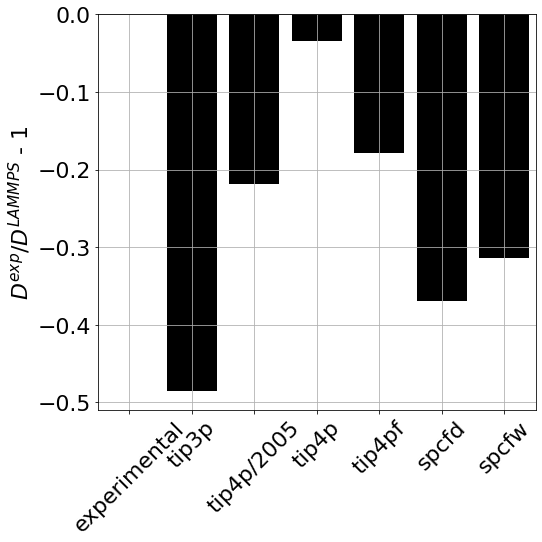

In [20]:
import seaborn as sea

plt.rcParams.update({'font.size': 22})


plt.figure(figsize=(8,8))
sea.barplot(x=list(vals.keys()),y=list(vals.values()),color='k')
plt.xticks(rotation=45)

plt.ylabel(R"$D^{exp}/D^{LAMMPS}$ - 1")
#plt.xlabel(R"Force Field")
plt.grid(True)
plt.tight_layout()

In [3]:
print("spcfd 300K D : ",self_correlation("spcfd/msd.dat").D)
print("spcfw 300K D : ",self_correlation("spcfw/msd.dat").D)
print("tip3p 300K D : ",self_correlation("tip3p/msd.dat").D)
print("\n")
print("tip4p/2005 300K D : ",self_correlation("2005/msd.dat").D)
print("tip4pf 300K D : ",self_correlation("tip4pf/msd.dat").D)
print("tip4p 300K D : ",self_correlation("tip4p/msd.dat").D)
print("\n")
print("Experimental data at 300K : ",self_correlation("tip4p/msd.dat").expected_from_experimental(300-273.15))

AttributeError: 'self_correlation' object has no attribute 'D'

In [10]:

vals["experimental"]= t2/t2-1
vals["tip3p"] = t2/4.49-1
vals["tip4p/2005"]= t2/2.38-1
vals["tip4p"]= t2/2.96-1
vals["tip4pf"]= t2/2.81-1
vals["spcfd"]= t2/3.67-1
vals["spcfw"]= t2/3.37-1

4.21

In [9]:
2.69+0.14

2.83